In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
chr_st = pd.read_csv("ev-charging-stations-india.csv")
chr_st

,name,state,city,address,lattitude,longitude,type
0,Neelkanth Star DC Charging Station,Haryana,Gurugram,"Neelkanth Star Karnal, NH 44, Gharunda, Kutail...",29.6019,76.980300,12.0
1,Galleria DC Charging Station,Haryana,Gurugram,"DLF Phase IV, Sector 28, Gurugram, Haryana 122022",28.4673,77.081800,12.0
2,Highway Xpress (Jaipur-Delhi) DC charging station,Rajasthan,Behror,"Jaipur to Delhi Road, Behror Midway, Behror, R...",27.8751,76.276000,12.0
3,Food Carnival DC Charging Station,Uttar Pradesh,Khatauli,"Fun and Food Carnival, NH 58, Khatauli Bypass,...",29.3105,77.721800,12.0
4,Food Carnival AC Charging Station,Uttar Pradesh,Khatauli,"NH 58, Khatauli Bypass, Bhainsi, Uttar Pradesh...",29.3105,77.721800,12.0
...,...,...,...,...,...,...,...
1542,Tata Power,Kerala,Munnar,"Gokulam Park Munnar, Power House Road, South C...",10.0297934,77.045859,7.0
1543,Tata Power,Haryana,Gurgaon,"Vatika Town Square II, Sector 82, Sector 82, V...",28.3904593,76.959200,7.0
1544,Tata Power,Haryana,Gurgaon,"Zedex TATA, Sec 48, GF-26, NIHO Scottish Mall,...",28.411072,77.040546,7.0
1545,Tata Power,Jammu,Jammu,"Le ROI, Jammu, Railway Station, Jammu, Jammu &...",32.7064117,74.879203,7.0


In [3]:
df = chr_st.copy()

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1547 non-null   object 
 1   state      1547 non-null   object 
 2   city       1547 non-null   object 
 3   address    1507 non-null   object 
 4   lattitude  1541 non-null   object 
 5   longitude  1541 non-null   float64
 6   type       1539 non-null   float64
dtypes: float64(2), object(5)
memory usage: 84.7+ KB


In [5]:
df.nunique()

name         1144
state          60
city          362
address      1180
lattitude    1202
longitude    1202
type           18
dtype: int64

In [6]:
df.describe()

,longitude,type
count,1.541000e+03,1539.000000
mean,1.105323e+05,9.020793
std,3.064996e+06,4.136436
min,8.058454e+00,6.000000
25%,7.562036e+01,7.000000
50%,7.721257e+01,7.000000
75%,7.847983e+01,11.000000
max,8.510551e+07,24.000000


In [7]:
df.isna().sum()

name          0
state         0
city          0
address      40
lattitude     6
longitude     6
type          8
dtype: int64

In [8]:
df['city'].value_counts()

Delhi             72
New Delhi         67
Chennai           48
Mumbai            45
bengaluru         38
                  ..
Kosi Kalan         1
Kotwan             1
Shivamogga         1
Karadagodu         1
Pathanamthitta     1
Name: city, Length: 362, dtype: int64

<AxesSubplot:xlabel='type', ylabel='count'>

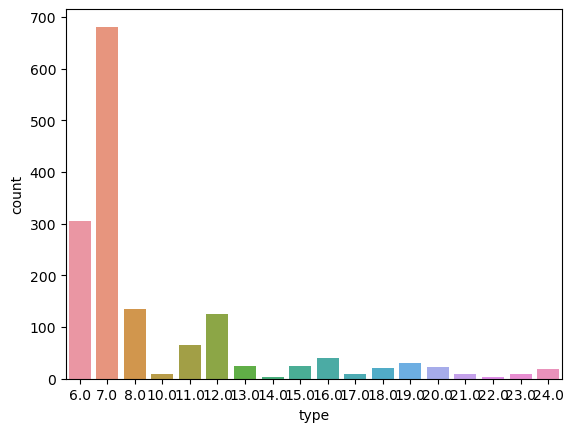

In [9]:
sns.countplot(x=df['type'])

In [10]:
df['name'].value_counts()

Tata Power                                                                      58
EESL Chelmsford Club                                                             9
Charge Zone                                                                      8
Hotel Sapthagiri Holiday Resorts,Tirupati u00e2u0080u0093 Bangalore  Highway     4
Brookfield, Powai                                                                4
                                                                                ..
Flip Side                                                                        1
Bliss Bakery & Cafe                                                              1
Swiss Castle, Vidyanagar                                                         1
Chai Kahani - Sainikpuri                                                         1
Neelkanth Star DC Charging Station                                               1
Name: name, Length: 1144, dtype: int64

<AxesSubplot:>

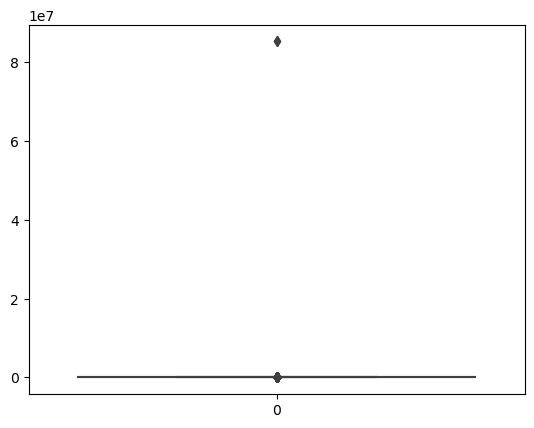

In [11]:
sns.boxplot(data=df['longitude'])

- Outlier present in lattitude

In [12]:
df.drop(['address','name'],axis=1,inplace= True)

# Data cleaning

In [13]:
list_state = df['state'].unique()

In [14]:
def clean_lattitude(data):
    if type(data)==str:
        new = data.replace(",","")
        data = float(new)
    else:
        data = float(data)
    return data

In [15]:
df['lattitude']=df['lattitude'].apply(clean_lattitude)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1547 entries, 0 to 1546
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   state      1547 non-null   object 
 1   city       1547 non-null   object 
 2   lattitude  1541 non-null   float64
 3   longitude  1541 non-null   float64
 4   type       1539 non-null   float64
dtypes: float64(3), object(2)
memory usage: 60.6+ KB


<AxesSubplot:>

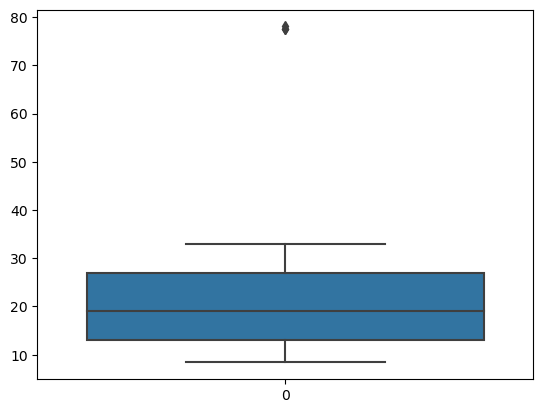

In [17]:
sns.boxplot(data=df['lattitude'])

<AxesSubplot:>

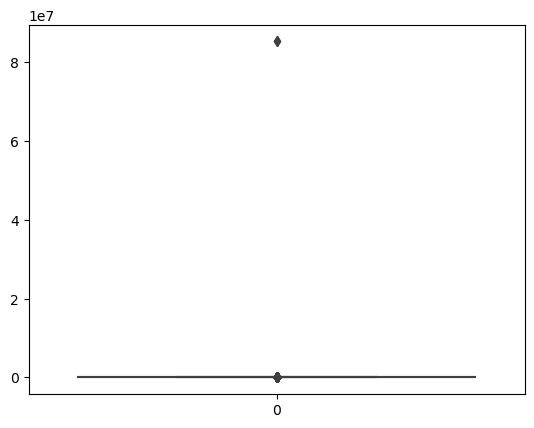

In [18]:
sns.boxplot(data=df['longitude'])

In [19]:
def clean_longitude(data):
    if data>100:
        num=data/1000000
    else:
        num = data
    return num

In [20]:
df['longitude'] = df['longitude'].apply(clean_longitude)

# Visulisation

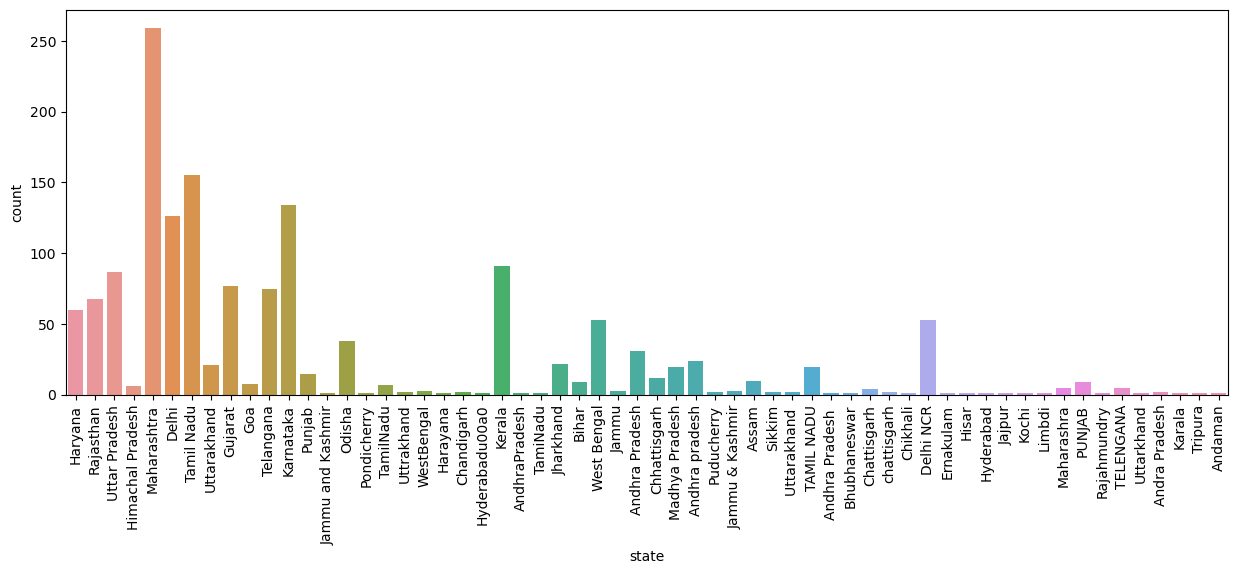

In [21]:
# most charging station in India
plt.figure(figsize=(15,5))
sns.countplot(x=df['state'])
plt.xticks(rotation =90)
plt.show()

<AxesSubplot:>

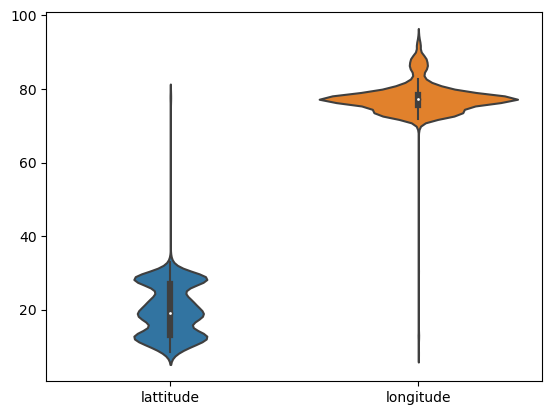

In [22]:
sns.violinplot(data= df[['lattitude','longitude']])

# Encoding

In [23]:
encoder = LabelEncoder()
df['state'] = encoder.fit_transform(df['state'])
df['city'] = encoder.fit_transform(df['city'])

# Imputation

In [24]:
imputer = SimpleImputer(strategy='mean')
impt_data = pd.DataFrame(data=imputer.fit_transform(df),columns=df.columns)
impt_data

,state,city,lattitude,longitude,type
0,19.0,109.0,29.601900,76.980300,12.0
1,19.0,109.0,28.467300,77.081800,12.0
2,43.0,39.0,27.875100,76.276000,12.0
3,52.0,155.0,29.310500,77.721800,12.0
4,52.0,155.0,29.310500,77.721800,12.0
...,...,...,...,...,...
1542,31.0,207.0,10.029793,77.045859,7.0
1543,19.0,108.0,28.390459,76.959200,7.0
1544,19.0,108.0,28.411072,77.040546,7.0
1545,25.0,127.0,32.706412,74.879203,7.0


# K-means clustering

In [25]:
wcs = []
for i in range (1,6):
    model = KMeans(n_clusters=i)
    model.fit(impt_data)
    wcs.append(model.inertia_)
print(wcs)

[18288204.639720786, 4568566.023496754, 2114534.4942086847, 1353707.8500418754, 1073564.5901748496]


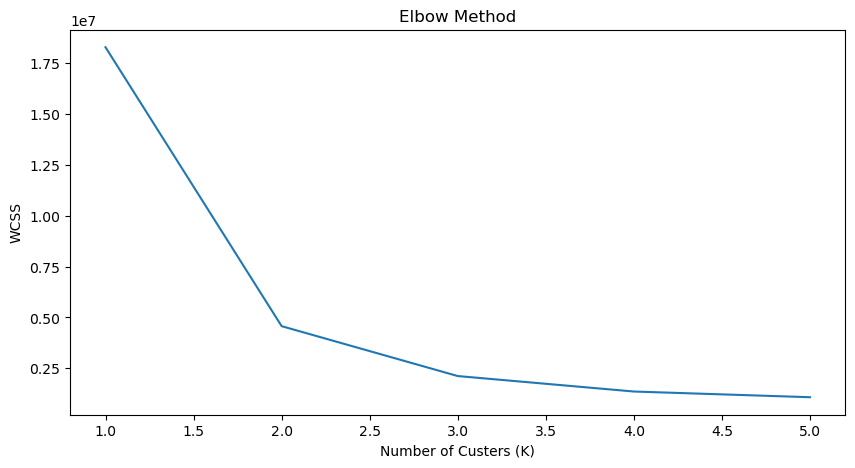

In [26]:
plt.figure(figsize=(10,5))
plt.title('Elbow Method')
plt.plot(range(1,6), wcs)
plt.xlabel('Number of Custers (K)')
plt.ylabel('WCSS')
plt.show()

So the best perform we get when value of **k=2**  i.e. two clusters formed

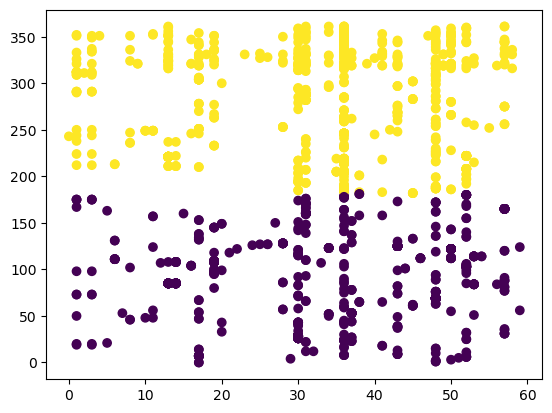

In [27]:
km = KMeans(n_clusters=2)
km.fit_transform(impt_data)
plt.scatter(impt_data.iloc[:, 0], impt_data.iloc[:, 1], c=km.labels_)
plt.show()